<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from elice_utils import EliceUtils
elice_utils = EliceUtils()

np.random.seed(100)

'''
1. 선형 회귀 모델의 클래스를 구현합니다.

   Step01. 가중치 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.

   Step02. Bias 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.

   Step03. W, X, b를 사용해 선형 모델을 구현하세요.
'''

class LinearModel:

    def __init__(self):

        self.W = tf.Variable(1.5)

        self.b = tf.Variable(1.5)

    def __call__(self, X, Y):

        return tf.add(tf.multiply(X, self.W), self.b)

'''
2. MSE 값을 계산해 반환하는 손실 함수를 완성합니다.
'''

def loss(y, pred):

    return tf.reduce_mean(tf.square(y - pred)) # (정답 - 예측값)의 제곱의 평균

'''
3. gradient descent 방식으로 학습하는 train 함수입니다.
   코드를 보면서 어떤 방식으로 W(가중치)와 b(Bias)이
   업데이트 되는지 확인해 보세요.
'''

def train(linear_model, x, y):

    with tf.GradientTape() as t: # tf.GradientTape()는 연산에 대한 것이 저장
        current_loss = loss(y, linear_model(x, y))

    # learning_rate 값 선언
    learning_rate = 0.001

    # gradient 값 계산
    delta_W, delta_b = t.gradient(current_loss, [linear_model.W, linear_model.b])

    # learning rate와 계산한 gradient 값을 이용하여 업데이트할 파라미터 변화 값 계산
    W_update = (learning_rate * delta_W)
    b_update = (learning_rate * delta_b)

    return W_update,b_update

def main():

    # 데이터 생성
    x_data = np.linspace(0, 10, 50)
    y_data = 4 * x_data + np.random.randn(*x_data.shape)*4 + 3

    # 데이터 출력
    plt.scatter(x_data,y_data)
    plt.savefig('data.png')
    elice_utils.send_image('data.png')

    # 선형 함수 적용
    linear_model = LinearModel()

    # epochs 값 선언
    epochs = 100

    # epoch 값만큼 모델 학습
    for epoch_count in range(epochs):

        # 선형 모델의 예측 값 저장
        y_pred_data=linear_model(x_data, y_data)

        # 예측 값과 실제 데이터 값과의 loss 함수 값 저장
        real_loss = loss(y_data, linear_model(x_data, y_data))

        # 현재의 선형 모델을 사용하여  loss 값을 줄이는 새로운 파라미터로 갱신할 파라미터 변화 값을 계산
        update_W, update_b = train(linear_model, x_data, y_data)

        # 선형 모델의 가중치와 Bias를 업데이트합니다.
        linear_model.W.assign_sub(update_W)
        linear_model.b.assign_sub(update_b)

        # 20번 마다 출력 (조건문 변경 가능)
        if (epoch_count%20==0):
            print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
            print('W: {}, b: {}'.format(linear_model.W.numpy(), linear_model.b.numpy()))

            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            ax1.scatter(x_data,y_data)
            ax1.plot(x_data,y_pred_data, color='red')
            plt.savefig('prediction.png')
            elice_utils.send_image('prediction.png')

if __name__ == "__main__":
    main()

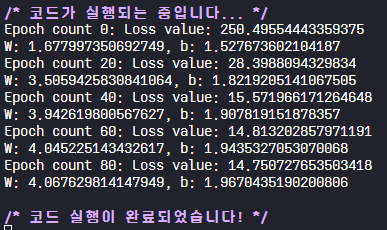

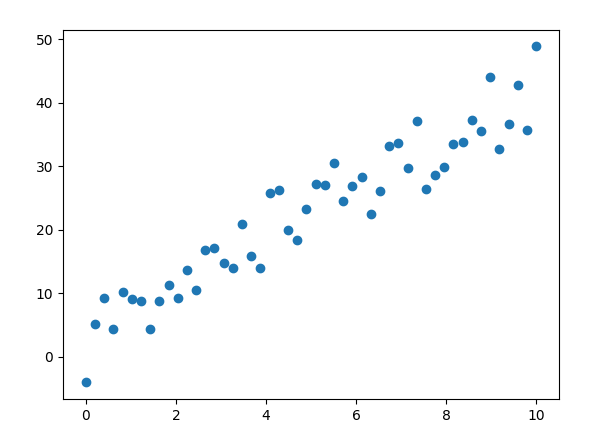

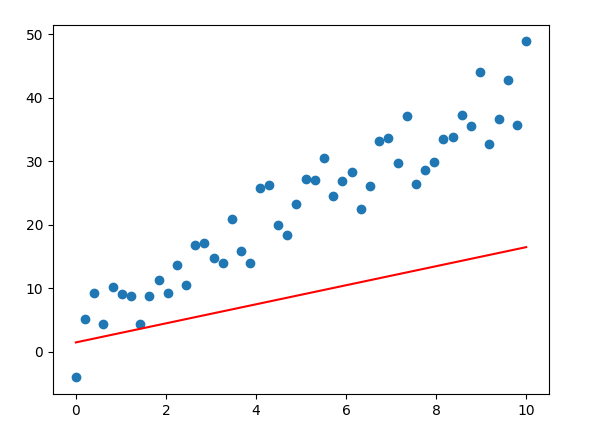

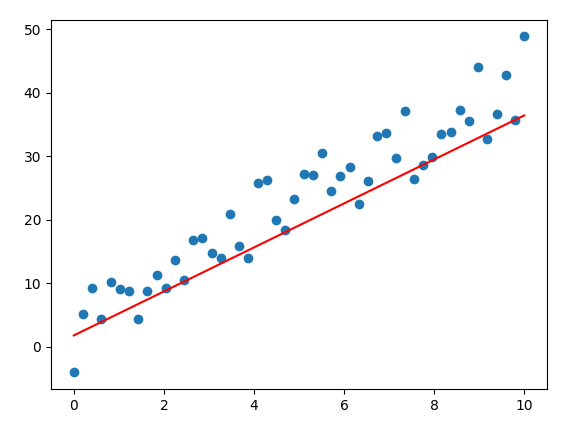

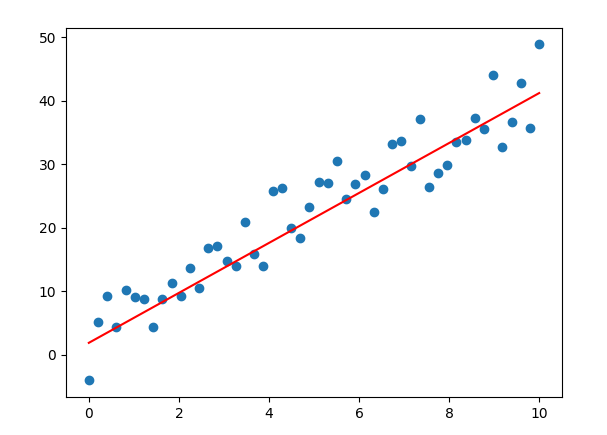

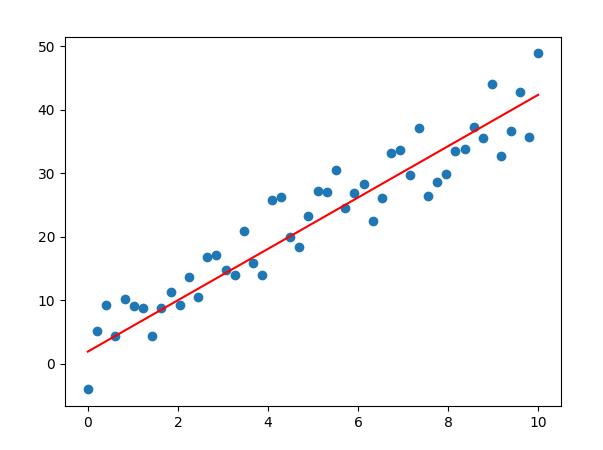

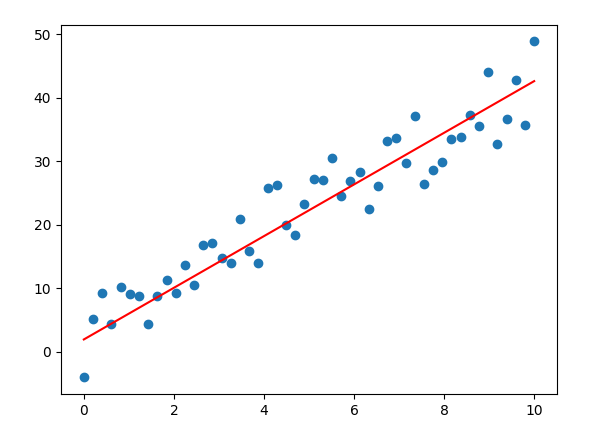